# Freeling

Utilizando el diccionario provisto por freeling en https://github.com/TALP-UPC/FreeLing/tree/master/data/es/dictionary construimos otra lista de palabras neutras.

In [1]:
import os

In [2]:
dirs = list(os.walk('freeling_dictionary'))

In [3]:
filenames = [dirs[1][0] + '/' + name for name in dirs[1][2]]

In [4]:
filenames

['freeling_dictionary/entries/MM.int',
 'freeling_dictionary/entries/MM.adj',
 'freeling_dictionary/entries/MM.nom',
 'freeling_dictionary/entries/MM.vaux',
 'freeling_dictionary/entries/MM.verb',
 'freeling_dictionary/entries/MM.adv',
 'freeling_dictionary/entries/MM.tanc']

In [5]:
f_verbos = 'freeling_dictionary/entries/MM.verb'
f_adj = 'freeling_dictionary/entries/MM.adj'
f_adv = 'freeling_dictionary/entries/MM.adv'
f_nom = 'freeling_dictionary/entries/MM.nom'
f_tanc = 'freeling_dictionary/entries/MM.tanc'

In [23]:
def get_eagles(line):
    return line.strip().split(' ')[2]

def get_word(line):
    return line.strip().split(' ')[0]

def filter_words_from_file(fname,ffilter):
    file = open(fname, 'r')
    lines = file.readlines()
    words = []
    errors = []
    for line in lines:
        try:
            if ffilter(line):
                words.append(get_word(line))
        except:
            errors.append(line.strip())
    return words, errors

def save_words_to_file(words, filename):
    with open(filename, 'w') as f:
        for word in words:
            f.write(word)
            f.write('\n')

# Adjetivos
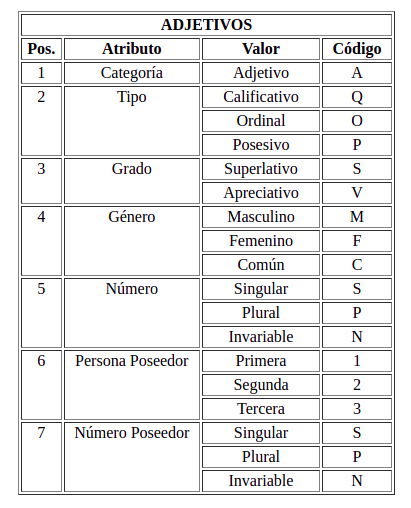

Para los adjetivos nos fijamos en la 4ta posición que haya una C

In [7]:
# Using readlines()
def is_neutral_adj(line):
    eagles = get_eagles(line)    
    return eagles[3] == 'C'

In [8]:
neutral_adj, errors = filter_words_from_file(f_adj,is_neutral_adj)

In [9]:
len(neutral_adj)

11973

In [25]:
save_words_to_file(neutral_adj, 'palabras_neutras/freeling/adj.lines')

# Nombres
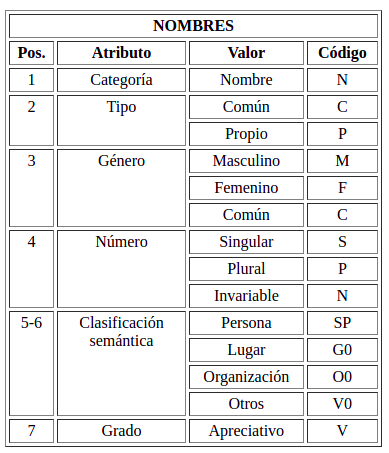

In [10]:
def is_neutral_nom(line):
    eagles = get_eagles(line)
    return eagles[2] == 'C'

def is_common_nom(line):
    eagles = get_eagles(line)
    return eagles[3] == 'N'

In [11]:
neutral_nom, errors = filter_words_from_file(f_nom,is_neutral_nom)

In [12]:
noms, errs = filter_words_from_file(f_nom, lambda x: True)

In [13]:
len(noms)

107638

In [14]:
len(neutral_nom)

4214

In [26]:
save_words_to_file(neutral_nom, 'palabras_neutras/freeling/noms.lines')

# Verbos
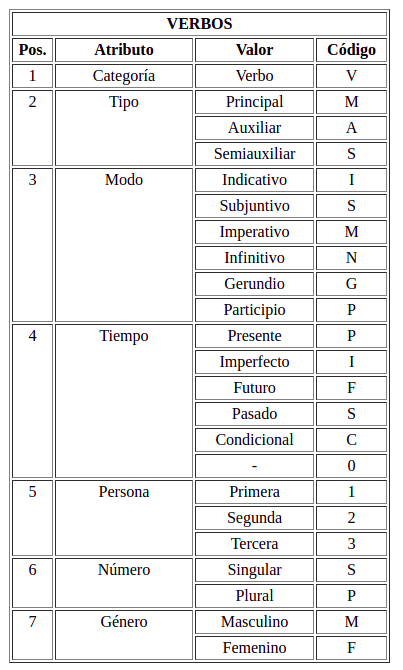

In [15]:
# Acá solo nos importa que no sean participios

In [16]:
def is_neutral_verb(line):
    eagles = get_eagles(line)
    return eagles[2] != 'P'

In [17]:
neutral_verbs, err = filter_words_from_file(f_verbos, is_neutral_verb)

In [18]:
len(neutral_verbs)

466878

In [19]:
f_verbos

'freeling_dictionary/entries/MM.verb'

In [27]:
save_words_to_file(neutral_verbs, 'palabras_neutras/freeling/verbs.lines')

# Adverbios
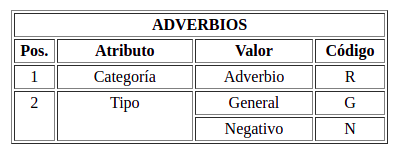

In [28]:
f_adv

'freeling_dictionary/entries/MM.adv'

In [29]:
neutral_advs, err = filter_words_from_file(f_adv, lambda x: True)

In [30]:
neutral_advs

['abajo',
 'acaso',
 'acullá',
 'acá',
 'adelante',
 'además',
 'adentro',
 'adondequiera',
 'adrede',
 'adunia',
 'afuera',
 'ahora',
 'ahí',
 'aindamáis',
 'ajorro',
 'alderredor',
 'alerta',
 'algo',
 'allende',
 'allá',
 'allí',
 'alrededor',
 'alto',
 'anoche',
 'ansí',
 'antarca',
 'antaño',
 'anteanoche',
 'anteanteanoche',
 'anteanteayer',
 'anteayer',
 'antedía',
 'antenoche',
 'antes',
 'antier',
 'aparte',
 'apenas',
 'aposta',
 'aprisa',
 'aquende',
 'aquí',
 'arredro',
 'arriba',
 'asimismo',
 'asina',
 'así',
 'asín',
 'atrás',
 'aun',
 'avante',
 'avanti',
 'ayer',
 'ayuso',
 'aún',
 'bajo',
 'barato',
 'bastante',
 'bien',
 'caput',
 'caro',
 'casi',
 'cerca',
 'chano',
 'chiticallando',
 'claro',
 'comoquiera',
 'conforme',
 'cuan',
 'cuantimás',
 'cuanto',
 'cuasi',
 'cuán',
 'debajo',
 'defuera',
 'delante',
 'demasiado',
 'dentro',
 'deprisa',
 'despacio',
 'después',
 'detrás',
 'dondequiera',
 'doquier',
 'doquiera',
 'duro',
 'encima',
 'endenantes',
 'enfrente',

In [31]:
save_words_to_file(neutral_advs, 'palabras_neutras/freeling/advs.lines')

In [33]:
all_neutral_words = neutral_adj + neutral_advs + neutral_nom + neutral_verbs

In [34]:
save_words_to_file(all_neutral_words, 'palabras_neutras/freeling/neutral_words_all.lines')